In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,LSTM,GRU,Dense,Bidirectional

In [3]:
num_words = 10000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = pad_sequences(X_train,maxlen=100,padding='post',truncating='post')
X_test = pad_sequences(X_test,maxlen=100,padding='post',truncating='post')

# **Bidirectional RNN**

In [11]:
model = Sequential()
model.add(Embedding(input_dim=10000,output_dim=32,input_length=100))
model.add(Bidirectional(SimpleRNN(5)))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.5114 - loss: 0.6964 - val_accuracy: 0.5411 - val_loss: 0.6868
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.7215 - loss: 0.6198 - val_accuracy: 0.5362 - val_loss: 0.7048
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8438 - loss: 0.4543 - val_accuracy: 0.5393 - val_loss: 0.7776
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9245 - loss: 0.2847 - val_accuracy: 0.5340 - val_loss: 0.8871
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9557 - loss: 0.1928 - val_accuracy: 0.5372 - val_loss: 0.9755


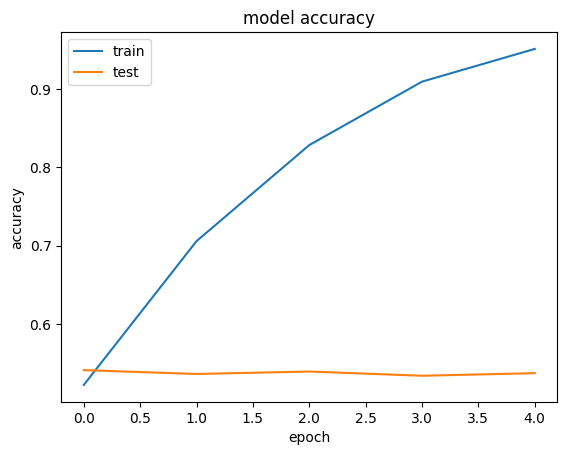

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

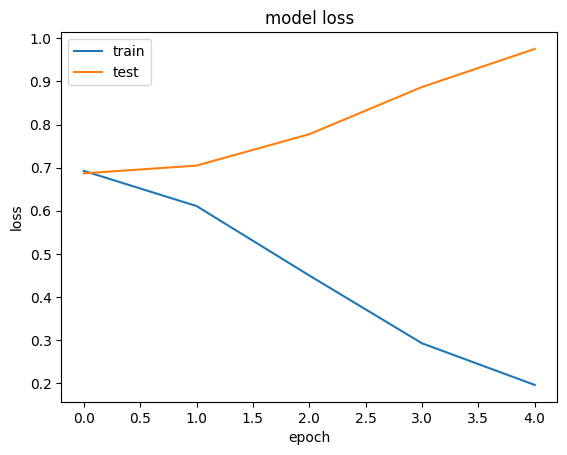

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

# **Bidiretional LSTM**

In [18]:
model = Sequential()
model.add(Embedding(10000,32,input_length=100))
model.add(Bidirectional(LSTM(5)))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.5826 - loss: 0.6638 - val_accuracy: 0.7853 - val_loss: 0.4755
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.8386 - loss: 0.3956 - val_accuracy: 0.8072 - val_loss: 0.4350
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.8710 - loss: 0.3138 - val_accuracy: 0.8072 - val_loss: 0.4372
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step - accuracy: 0.9138 - loss: 0.2436 - val_accuracy: 0.7953 - val_loss: 0.4897
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9289 - loss: 0.2118 - val_accuracy: 0.7926 - val_loss: 0.5349


# **Bidirectional GRU**

In [21]:
model = Sequential()
model.add(Embedding(10000,32,input_length=100))
model.add(Bidirectional(GRU(5)))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.6121 - loss: 0.6245 - val_accuracy: 0.8064 - val_loss: 0.4412
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 84ms/step - accuracy: 0.8607 - loss: 0.3332 - val_accuracy: 0.8124 - val_loss: 0.4293
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9094 - loss: 0.2381 - val_accuracy: 0.8086 - val_loss: 0.4453
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 98ms/step - accuracy: 0.9369 - loss: 0.1788 - val_accuracy: 0.8026 - val_loss: 0.5026
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9582 - loss: 0.1245 - val_accuracy: 0.7958 - val_loss: 0.5902
